In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [3]:
!pip uninstall -y lxml

Found existing installation: lxml 5.4.0
Uninstalling lxml-5.4.0:
  Successfully uninstalled lxml-5.4.0


In [4]:
!pip install --quiet \
    lxml-html-clean \
    lxml newspaper3k \
    google-api-python-client \
    pandas \
    matplotlib \
    seaborn \
    nltk \
    requests \
    beautifulsoup4 \
    tqdm \
    torch \
    transformers \
    scipy \
    vaderSentiment \
    scikit-learn \
    googlesearch-python \
    praw

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 10.8 MB/s eta 0:00:00


In [5]:
import os
import sys
import time
import warnings
warnings.filterwarnings('ignore', message="To exit: use 'exit', 'quit', or Ctrl-D.")
warnings.filterwarnings('ignore', message="An exception has occurred, use %tb to see the full traceback.")
warnings.filterwarnings('ignore')

import logging
logging.getLogger('praw').setLevel(logging.CRITICAL)

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
# Suppress only the ConvergenceWarning from sklearn
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from googlesearch import search
from newspaper import Article
stop_words = set(stopwords.words('english'))

import praw
from datetime import datetime
from prawcore.exceptions import NotFound

In [6]:
from Reddit_Full_Scrap import scrape_reddit
from Reddit_Full_Preprocess import preprocess_data
from Reddit_Sentiment_Analysis import run_rd_sentiment_analysis
from Youtube_Full_Scrap import scrape_youtube
from Youtube_Full_Preprocess import preprocess_youtube_data
from Youtube_Sentiment_Analysis import run_yt_sentiment_analysis
from Full_Topic_Modelling import run_topic_modelling
from Full_Sentiment_vs_Topic import run_sent_topic
from Bing_Full_Scrap import scrape_news
from Bing_Full_Preprocess import preprocess_bing_articles
from Bing_Sentiment_Analysis import run_bing_sentiment_analysis
from Medium_Full import scrape_medium,preprocess_medium,run_medium_sentiment_analysis
from All_Sentiments_4 import run_all_sent

In [7]:
from ChatBot_Main import main

                                         📢 Welcome to Policy Insights Chatbot!                                          

Available Platforms for Analysis :
1. Reddit
2. YouTube
3. Bing Articles
4. Medium
5. Sentiment Distribution across platforms
6. Exit

Enter your choice : 1

Enter keywords (comma separated): make in india

You have opted for REDDIT Data Analysis
Enter subreddit to search (default: india): india

Hold on! We’re collecting the content and tidying it up for you. This might take a little while—thank you for your patience!

⏳ Scraping data...
🔄 Parsing 3/3 |██████████| 100%
✅ Parsing complete!
Data scrapping successfully completed

Total unique posts found: 220
✅ Reddit data saved successfully in 'reddit_full.csv'

🧹 Preprocessing data...
🔎 Checking users... (this may take a few minutes)
✅ Bot filtering complete. Saved to cleaned_reddit_full.csv

What would you like to do?
1️⃣ Sentiment Analysis
2️⃣ Topic Modeling
3️⃣ Sentiment vs Topics
4️⃣ Return to Home
5️⃣ Exit
Ente

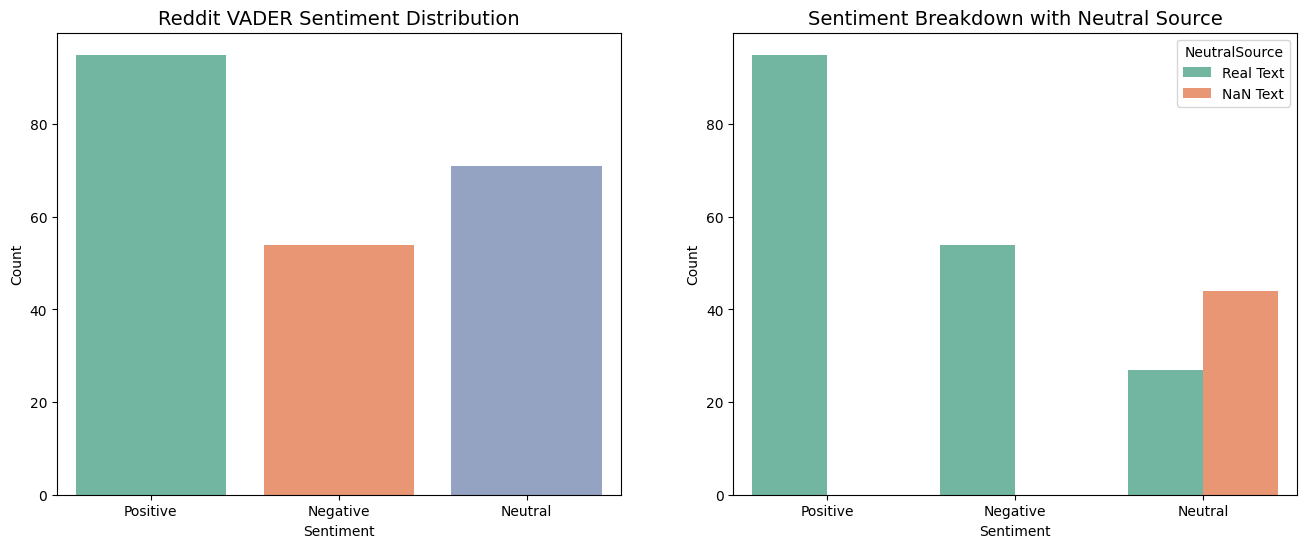

✅ Sentiment data stored in 'reddit_full_vader_sentiment.csv'

What would you like to do?
1️⃣ Sentiment Analysis
2️⃣ Topic Modeling
3️⃣ Sentiment vs Topics
4️⃣ Return to Home
5️⃣ Exit
Enter your choice: 2
Enter number of topics : 4


🔹 Topic 0:
people, indians, like, india, country, dont, culture, indian, live, abroad

🔹 Topic 1:
women, men, rape, woman, care, hate, dont, safe, society, raped

🔹 Topic 2:
government, bjp, political, power, modi, indias, law, hindi, congress, china

🔹 Topic 3:
im, job, want, like, parents, help, family, money, work, ive



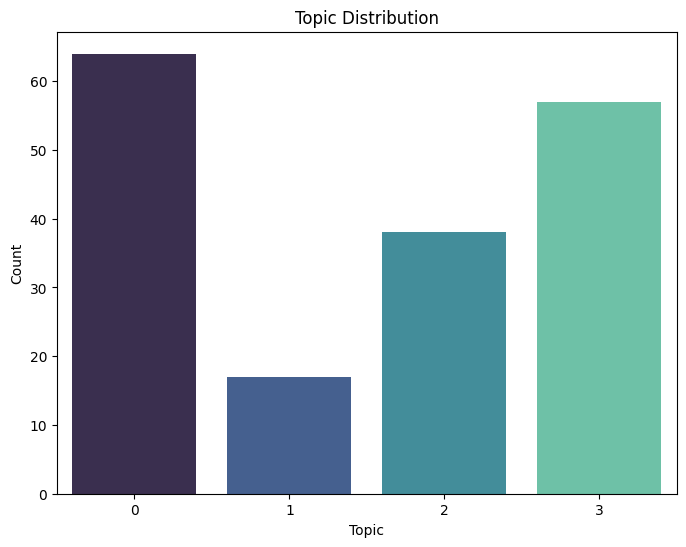


 Data saved to topic_modelling.csv


What would you like to do?
1️⃣ Sentiment Analysis
2️⃣ Topic Modeling
3️⃣ Sentiment vs Topics
4️⃣ Return to Home
5️⃣ Exit
Enter your choice: 3
Enter model type : vader
Enter number of topics : 4


🔹 Topic 0:
people, indians, like, india, country, dont, culture, indian, live, abroad

🔹 Topic 1:
women, men, rape, woman, care, hate, dont, safe, society, raped

🔹 Topic 2:
government, bjp, political, power, modi, indias, law, hindi, congress, china

🔹 Topic 3:
im, job, want, like, parents, help, family, money, work, ive

Sentiment
Positive    95
Negative    54
Neutral     27
Name: count, dtype: int64


Sentiment  Negative  Neutral  Positive
Topic                                 
0                16        9        39
1                 7        2         8
2                13        8        17
3                18        8        31


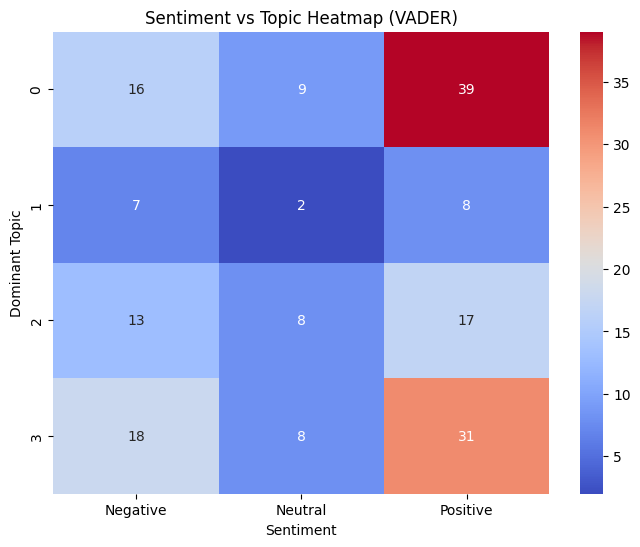


What would you like to do?
1️⃣ Sentiment Analysis
2️⃣ Topic Modeling
3️⃣ Sentiment vs Topics
4️⃣ Return to Home
5️⃣ Exit
Enter your choice: 4
                                         📢 Welcome to Policy Insights Chatbot!                                          

Available Platforms for Analysis :
1. Reddit
2. YouTube
3. Bing Articles
4. Medium
5. Sentiment Distribution across platforms
6. Exit

Enter your choice : 6

👋 Exiting the chatbot. Thank you!


In [8]:
main()